# Bankruptcy Analysis 

In [1]:
import numpy as np
import pandas as pd

import sklearn.linear_model as sk
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pd.set_option('max_columns', None)

#reading data and removing Nan values
data = pd.read_csv('FinancialDataSet.csv', usecols=np.r_[0:66])
#converting object to float
for col in data.columns: 
    data[col] = pd.to_numeric(data[col], errors='coerce')
    
data = data.fillna("0")

/home/vaibhav/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (1,2,3,6,7,9,10,11,13,14,15,18,19,20,22,23,24,25,29,30,31,35,36,38,39,42,43,44,48,49,51,55,56,57,58,59,62) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
data.head()

,id,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,1,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,0.50494,0.24976,0.6598,0.1666,0.24976,497.42,0.73378,2.6349,0.24976,0.14942,43.37,1.2479,0.21402,0.11998,0.47706,0.50494,0.60411,1.4582,1.7615,5.9443,0.11788,0.14942,94.14,3.8772,0.56393,0.21402,1.741,593.27,0.50591,0.12804,0.66295,0.051402,0.12804,114.42,71.05,1.0097,1.5225,49.394,0.1853,0.11085,2.042,0.37854,0.25792,2.2437,2.248,348690,0.12196,0.39718,0.87804,0.001924,8.416,5.1372,82.658,4.4158,7.4277,0
1,2,0.20912,0.49988,0.47225,1.9447,14.786,0,0.25834,0.99601,1.6996,0.49788,0.26114,0.5168,0.15835,0.25834,677.96,0.53838,2.0005,0.25834,0.152,87.981,1.4293,0.24806,0.12304,0,0.39542,0.43992,88.444,16.946,3.6884,0.26969,0.152,122.17,2.9876,2.9876,0.20616,1.6996,0,0.49788,0.1213,0.086422,0.064371,0.14595,199.49,111.51,0.51045,1.1252,100.13,0.23727,0.13961,1.9447,0.49988,0.33472,17.866,17.866,2304.6,0.1213,0.42002,0.853,0,4.1486,3.2732,107.35,3.4,60.987,0
2,3,0.24866,0.69592,0.26713,1.5548,-1.1523,0,0.30906,0.43695,1.309,0.30408,0.31258,0.64184,0.24435,0.30906,794.16,0.45961,1.4369,0.30906,0.2361,73.133,1.4283,0.3026,0.18996,0,0.28932,0.37282,86.011,1.0627,4.3749,0.41929,0.23815,176.93,2.063,1.4274,0.31565,1.309,2.3019,0.51537,0.24114,0.32202,0.07402,0.23117,165.51,92.381,0.94807,1.0101,96.372,0.29181,0.22293,1.0758,0.48152,0.48474,1.2098,2.0504,6332.7,0.24114,0.81774,0.76599,0.69484,4.9909,3.951,134.27,2.7185,5.2078,0
3,4,0.081483,0.30734,0.45879,2.4928,51.952,0.14988,0.092704,1.8661,1.0571,0.57353,0.092704,0.30163,0.094257,0.092704,917.01,0.39803,3.2537,0.092704,0.071428,79.788,1.5069,0.1155,0.062782,0.17193,0.57353,0.36152,0.94076,1.9618,4.6511,0.14343,0.071428,91.37,3.9948,0.37581,0.1155,1.3562,0,0.57353,0.088995,0.40139,0.069622,0.088995,180.77,100.98,0.2872,1.5696,84.344,0.085874,0.066165,2.4928,0.30734,0.25033,2.4524,2.4524,20545,0.054015,0.14207,0.94598,0,4.5746,3.6147,86.435,4.2228,5.5497,0
4,5,0.18732,0.61323,0.2296,1.4063,-7.3128,0.18732,0.18732,0.6307,1.1559,0.38677,0.18732,0.33147,0.12182,0.18732,1133.2,0.32211,1.6307,0.18732,0.11553,57.045,0,0.19832,0.11553,0.18732,0.38677,0.32211,1.4138,1.1184,4.1424,0.27884,0.11553,147.04,2.4823,0.3234,0.19832,1.6278,11.247,0.43489,0.12231,0.29304,0.09668,0.12231,141.62,84.574,0.73919,0.95787,65.936,0.18811,0.11601,1.2959,0.56511,0.40285,1.8839,2.1184,3186.6,0.13485,0.48431,0.86515,0.12444,6.3985,4.3158,127.21,2.8692,7.898,0


## Data processing 

In [3]:
def preprocess_inputs(df):
    """
    adding all Fraud data with sample of Normal data of same size;
    
    skewed classes correction
    
    """
    Fraud = df[df['class']==1]
    Normal = df[df['class']==0]
    Normal_sample = Normal.sample(n=len(Fraud))
    
    df = Normal_sample.append(Fraud)
    
    y = df['class']
    X = df.drop(['class'], axis = 1)
#splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
#scaling the data
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns) #creating dataframe & combining x_traindata
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns) #creating dataframe & combining x_test data
    return X_train, X_test, y_train, y_test
   


### Test Train split 

In [4]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [5]:
X_train.head()

,id,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
37286,0.970006,0.024270,-0.042539,0.037320,-0.101533,0.026156,0.047232,0.022096,-0.044634,-0.069167,0.032917,0.016720,0.015924,-0.021067,0.022092,-0.026385,0.009051,-0.039056,0.019852,-0.015099,-0.452203,0.130519,0.018750,-0.013614,0.017309,0.045977,0.011295,-0.045854,-0.055005,0.409472,-0.006557,-0.016375,-0.049668,-0.090998,-0.122787,0.021306,-0.037952,-0.040069,0.030217,0.061364,-0.082076,0.005206,0.024679,-0.055380,-0.014524,-0.020020,-0.078306,-0.048363,0.011242,0.021528,-0.083154,-0.036625,-0.053783,-0.037132,-0.041719,-0.058478,0.102929,0.018253,-0.023351,-0.028899,-0.027313,-0.220290,-0.033940,-0.100044,-0.062740
27579,0.209102,0.030083,-0.059580,0.067289,-0.022391,0.033324,0.046238,0.030554,-0.034837,-0.056795,0.051945,0.025277,0.018350,-0.020968,0.030550,-0.029364,0.010127,-0.031850,0.028255,-0.012163,-0.474511,0.030575,0.022817,-0.010997,0.059421,0.049136,0.011848,0.006761,-0.025716,-0.180542,-0.010993,-0.013435,-0.052919,-0.061793,-0.024717,0.023575,-0.063364,-0.046828,0.045476,0.076721,0.023605,0.004736,0.031618,-0.084927,-0.042553,-0.017853,-0.017161,-0.049581,0.024597,0.038510,-0.007497,-0.052494,-0.059564,-0.022448,-0.027802,-0.028614,0.047827,0.020221,-0.022296,-0.049529,-0.021058,-0.160643,-0.035264,-0.069936,-0.059145
31773,0.537857,0.087621,-0.074837,0.083599,0.394406,0.026900,0.046238,0.101988,0.038034,0.233855,0.066420,0.097310,0.102896,-0.020460,0.101984,-0.035023,0.101191,0.024474,0.099224,-0.008805,-0.248782,0.114069,0.103732,-0.007710,0.261873,0.063504,0.087767,-0.045854,0.006733,-1.877549,-0.009365,-0.010081,-0.058793,1.109406,1.581146,0.106942,0.157768,-0.046828,0.059950,0.155439,0.199914,-0.005757,0.051484,-0.107203,-0.086149,-0.019644,0.207177,-0.037993,0.089471,0.061202,0.490067,-0.064989,-0.069901,-0.005299,-0.010588,-0.116639,0.125367,0.038891,-0.024036,-0.049529,-0.034763,1.590735,-0.038333,1.548240,-0.006082
27664,0.215765,0.009008,0.039950,-0.055962,-0.139037,-0.012205,0.031706,0.008087,-0.053414,-0.076191,-0.079569,0.002588,0.015285,-0.022378,0.008083,-0.150349,0.006773,-0.044757,0.005934,-0.022124,0.755692,0.049496,0.018573,-0.022727,-0.009451,-0.061901,0.008824,-0.045797,-0.087103,1.082938,0.010529,-0.023400,0.009995,-0.139299,-0.123530,0.021129,-0.089283,-0.046828,-0.086031,0.072774,-0.094210,0.052231,0.027956,0.041392,-0.027832,-0.020463,-0.130163,0.005298,0.016809,0.020793,-0.119983,0.049972,0.051593,-0.058000,-0.063490,-2.614524,0.036134,0.019935,-0.021183,-0.049529,-0.036400,-0.198661,-0.002073,-0.165033,-0.067468
37404,0.979255,0.004031,-0.060111,0.055618,-0.045371,0.030852,0.046238,0.002747,-0.034273,-0.103230,0.052459,-0.002797,0.010503,-0.023877,0.002743,-0.040753,0.003556,-0.031416,0.000629,-0.027631,-0.444950,-0.609249,-0.005421,-0.029251,-0.001792,0.062783,0.005536,-5.176802,-0.046789,-0.871330,-0.009817,-0.028906,-0.053076,-0.055067,-0.021008,-0.050903,-0.076094,-0.046828,0.045990,-0.628132,-0.020180,-0.013340,-0.037909,-0.009285,0.031760,-0.026403,-0.059912,-0.049696,0.001334,-0.034161,-0.033963,-0.053574,-0.060375,-0.032362,-0.037754,-0.104827,-0.646098,0.008704,-0.017099,-0.049529,-0.028400,-0.258745,-0.032403,-0.118700,-0.067423


### Model from sklearn

In [6]:
original_models = {
    "Logistic Regression": LogisticRegression()
}

for name, model in original_models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

Logistic Regression trained.


/home/vaibhav/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Test results 

In [7]:
original_results = []

for name, model in original_models.items():
    result = model.score(X_train, y_train)
    original_results.append(result)
    print(name + ": {:.2f}%".format(result * 100))

Logistic Regression: 69.46%


In [8]:
y_test.value_counts() / len(y_test)

0    0.518755
1    0.481245
Name: class, dtype: float64

## PCA 

In [ ]:
n_components = 64

pca = PCA(n_components=n_components)
pca.fit(X_train)

X_train_reduced = pd.DataFrame(pca.transform(X_train), index=X_train.index, columns=["PC" + str(i) for i in range(1, n_components + 1)])
X_test_reduced = pd.DataFrame(pca.transform(X_test), index=X_test.index, columns=["PC" + str(i) for i in range(1, n_components + 1)])

In [ ]:
X_train_reduced

In [ ]:
fig = px.bar(
    x=["PC" + str(i) for i in range(1, n_components + 1)],
    y=pca.explained_variance_ratio_,
    labels={'x': "Principal Component", 'y': "Variance Ratio"},
    color=pca.explained_variance_ratio_,
    color_continuous_scale=[(0, 'lightblue'), (1, 'darkblue')],
    title="Proportion of Variance in Principal Components"
)

fig.show()

In [ ]:
reduced_models = {
    " Logistic Regression": LogisticRegression()
}
for name, model in original_models.items():
    model.fit(X_train_reduced, y_train)
    print(name + " trained.")

In [ ]:
from sklearn.metrics import accuracy_score

for name, model in reduced_models.items():
    result = model.score(X_test)
    acc = accuracy_score(result, y_test)
    print(name, round(acc * 100,2))

# CNN model

In [9]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [10]:
X_train, X_test, y_train, y_test = X_train.values, X_test.values, y_train.values, y_test.values

In [11]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [81]:
import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [82]:
cnn = Sequential()
cnn.add(Conv1D(32, 2, activation='relu', input_shape=(65,1)))
cnn.add(Dropout(0.1))

cnn.add(Conv1D(64, 2, activation='relu'))
cnn.add(Dropout(0.2))

cnn.add(Flatten())
cnn.add(Dropout(0.3))
cnn.add(Dense(64, activation='relu'))
cnn.add(Dropout(0.3))

cnn.add(Dense(1, activation='sigmoid'))

cnn.summary()

cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 64, 32)            96        
_________________________________________________________________
dropout_4 (Dropout)          (None, 64, 32)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 63, 64)            4160      
_________________________________________________________________
dropout_5 (Dropout)          (None, 63, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4032)              0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 4032)              0         
_________________________________________________________________
dense_31 (Dense)             (None, 64)               

In [83]:
epochs = 50
batch_size = 8

In [84]:
history = cnn.fit(X_train, y_train, verbose=1 , batch_size=batch_size , epochs=epochs, validation_data=(X_test, y_test) )

Epoch 1/50
366/366 [==============================] - 4s 8ms/step - loss: 0.6572 - accuracy: 0.6237 - val_loss: 0.7250 - val_accuracy: 0.7127
Epoch 2/50
366/366 [==============================] - 3s 8ms/step - loss: 0.5770 - accuracy: 0.6920 - val_loss: 0.7381 - val_accuracy: 0.7167
Epoch 3/50
366/366 [==============================] - 3s 8ms/step - loss: 0.5593 - accuracy: 0.7131 - val_loss: 0.8015 - val_accuracy: 0.7143
Epoch 4/50
366/366 [==============================] - 3s 8ms/step - loss: 0.5475 - accuracy: 0.7259 - val_loss: 0.7645 - val_accuracy: 0.7247
Epoch 5/50
366/366 [==============================] - 3s 8ms/step - loss: 0.5253 - accuracy: 0.7397 - val_loss: 0.7344 - val_accuracy: 0.7183
Epoch 6/50
366/366 [==============================] - 3s 8ms/step - loss: 0.5350 - accuracy: 0.7252 - val_loss: 0.9261 - val_accuracy: 0.7334
Epoch 7/50
366/366 [==============================] - 3s 8ms/step - loss: 0.5370 - accuracy: 0.7363 - val_loss: 1.0617 - val_accuracy: 0.7279
Epoch 

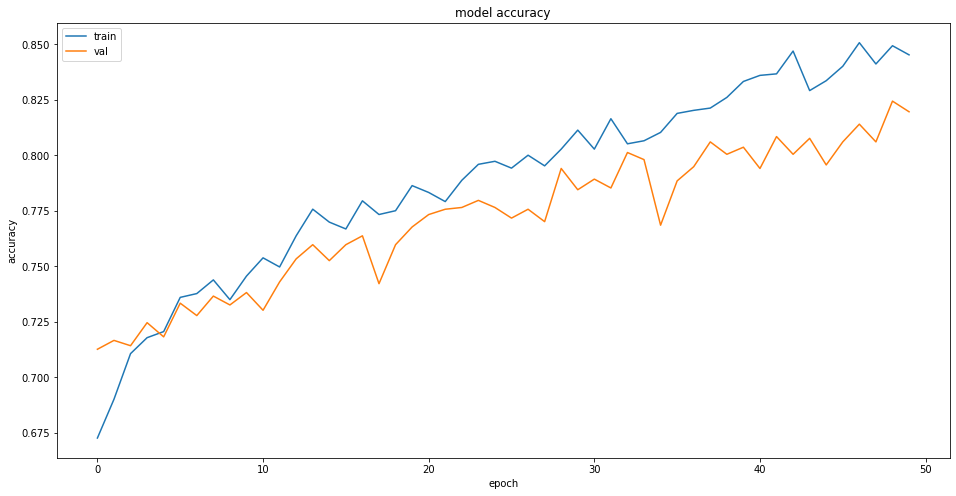

In [85]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [86]:
loss, accuracy = cnn.evaluate(X_test, y_test, verbose=1)

print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

40/40 [==============================] - 0s 4ms/step - loss: 1.8455 - accuracy: 0.8196
Test: accuracy = 0.819633  ;  loss = 1.845523


/home/vaibhav/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


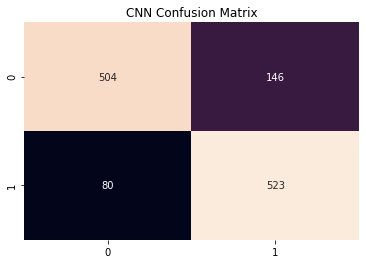

In [87]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

y_pred = cnn.predict_classes(X_test)
cm = confusion_matrix(y_test, y_pred)
report =  classification_report(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.title('CNN Confusion Matrix')
plt.savefig('cnn_con_mat')
plt.show()

In [88]:
print(report)

              precision    recall  f1-score   support

           0       0.86      0.78      0.82       650
           1       0.78      0.87      0.82       603

    accuracy                           0.82      1253
   macro avg       0.82      0.82      0.82      1253
weighted avg       0.82      0.82      0.82      1253



## FF net

### Model

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,Input
from keras import regularizers
from math import sqrt

from keras.models import Model, load_model

In [73]:
input_dim = X_train.shape[1]
learning_rate = 1e-4
epoch = 20
batch_size = 1

input_layer = Input(shape=(input_dim, ))
encoder = Dense(256, activation="tanh", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
encoder = Dense(64, activation="tanh")(encoder)
out = Dense(2, activation="softmax")(encoder)
NN = Model(inputs=input_layer, outputs=out)

In [74]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
enc.fit(y_train.reshape(-1,1))

out = enc.transform(y_train.reshape(-1,1)).toarray()

In [75]:
NN.compile(metrics=['accuracy'],loss='mean_squared_error',optimizer='adam')

history = NN.fit(X_train, out,epochs=epoch, batch_size=batch_size,
                shuffle=True, validation_data=(X_test, y_test),verbose=1)

Epoch 1/20
2921/2921 [==============================] - 6s 2ms/step - loss: 0.2319 - accuracy: 0.6508 - val_loss: 0.3409 - val_accuracy: 0.5355
Epoch 2/20
2921/2921 [==============================] - 6s 2ms/step - loss: 0.2031 - accuracy: 0.6924 - val_loss: 0.2929 - val_accuracy: 0.4844
Epoch 3/20
2921/2921 [==============================] - 6s 2ms/step - loss: 0.1969 - accuracy: 0.7106 - val_loss: 0.3175 - val_accuracy: 0.4437
Epoch 4/20
2921/2921 [==============================] - 6s 2ms/step - loss: 0.1856 - accuracy: 0.7290 - val_loss: 0.3361 - val_accuracy: 0.5180
Epoch 5/20
2921/2921 [==============================] - 6s 2ms/step - loss: 0.1878 - accuracy: 0.7225 - val_loss: 0.3194 - val_accuracy: 0.3911
Epoch 6/20
2921/2921 [==============================] - 6s 2ms/step - loss: 0.1828 - accuracy: 0.7286 - val_loss: 0.3285 - val_accuracy: 0.4868
Epoch 7/20
2921/2921 [==============================] - 6s 2ms/step - loss: 0.1745 - accuracy: 0.7461 - val_loss: 0.3239 - val_accuracy:

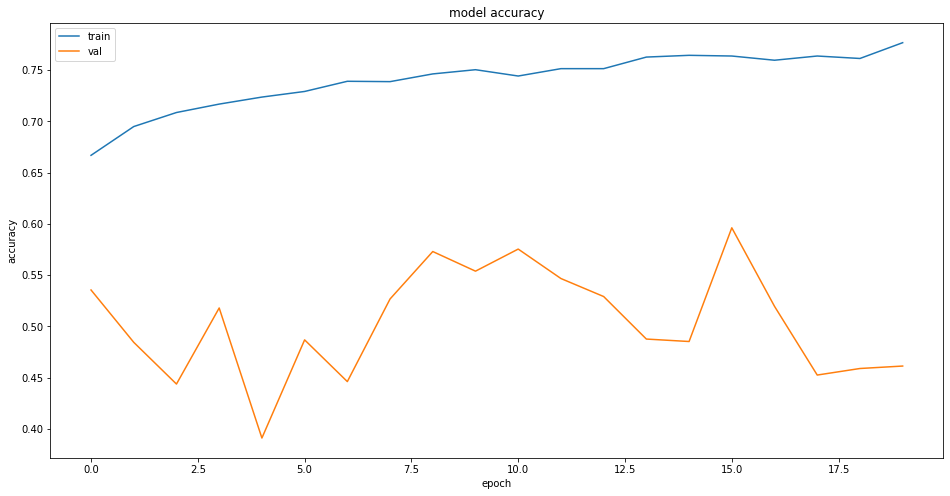

In [76]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [77]:
loss, accuracy = cnn.evaluate(X_test, y_test, verbose=1)

40/40 [==============================] - 0s 4ms/step - loss: 1.4556 - accuracy: 0.7805


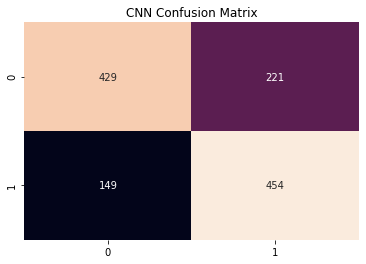

In [79]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

y_pred = NN.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred)
report =  classification_report(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.title('FFN Confusion Matrix')
plt.savefig('ffn_con_mat')
plt.show()

In [80]:
print(report)

              precision    recall  f1-score   support

           0       0.74      0.66      0.70       650
           1       0.67      0.75      0.71       603

    accuracy                           0.70      1253
   macro avg       0.71      0.71      0.70      1253
weighted avg       0.71      0.70      0.70      1253

